In [0]:
!pip install mxnet-cu100

#MXNet (Using Gluon)

In [0]:
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

data_ctx = mx.cpu()
model_ctx = mx.gpu()

##Getting the dataset

In [0]:
def transform(data, label):
    return data.astype('float32')/255.0, label.astype('float32')

mnist_train = gluon.data.vision.MNIST(train = True, transform = transform)
mnist_test = gluon.data.vision.MNIST(train = False, transform = transform)

In [0]:
image, label = mnist_train[0]
image.shape, label.shape

((28, 28, 1), ())

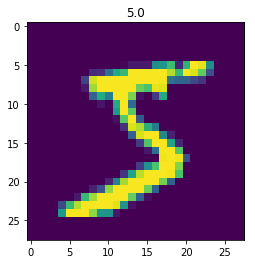

In [0]:
plt.imshow(image.reshape((28, 28)).asnumpy())
plt.title(label)
plt.show()

##Defining data loader

In [0]:
batch_size = 64
training_data = gluon.data.DataLoader(mnist_train, batch_size = batch_size, shuffle = True)
testing_data = gluon.data.DataLoader(mnist_test, batch_size = batch_size, shuffle = False)

##Building the model

In [0]:
model = gluon.nn.Dense(10)
model.initialize(mx.init.Normal(sigma = 1.0), model_ctx)

##Defining our objective function

In [0]:
categoricalcrossentropy = gluon.loss.SoftmaxCrossEntropyLoss()

##Defining our parameter optimizer

In [0]:
optimizer = gluon.Trainer(model.collect_params(), 'sgd', {'learning_rate': 0.1})

##Defining our accuracy function

In [0]:
def accuracy(predictions, labels):
    return nd.mean(predictions.argmax(1) == labels)

##Training the  model

In [0]:
epochs = 10
num_batches = 60000/batch_size
losses = []
accs = []

for epoch in range(epochs):
    cumulative_loss = 0
    cumulative_acc = 0
    for features, labels in training_data:
        features = features.as_in_context(model_ctx)
        labels = labels.as_in_context(model_ctx)
        with autograd.record():
            output = model(features)
            loss = categoricalcrossentropy(output, labels)
        loss.backward()
        optimizer.step(batch_size)
        cumulative_loss += loss.mean()
        cumulative_acc += accuracy(output, labels)
    cost = cumulative_loss.asscalar()/num_batches
    acc = cumulative_acc.asscalar()/num_batches
    print(f'Epoch: {epoch} Loss: {cost} Accuracy: {acc}')
    losses.append(cost)
    accs.append(acc)

Epoch: 0 Loss: 1.9556088541666667 Accuracy: 0.6740333333333334
Epoch: 1 Loss: 0.8585227213541666 Accuracy: 0.8203833333333334
Epoch: 2 Loss: 0.707626953125 Accuracy: 0.8469166666666667
Epoch: 3 Loss: 0.6295673177083333 Accuracy: 0.8603333333333333
Epoch: 4 Loss: 0.5791789713541666 Accuracy: 0.8693166666666666
Epoch: 5 Loss: 0.5421420247395833 Accuracy: 0.8756
Epoch: 6 Loss: 0.5148118489583333 Accuracy: 0.8800833333333333
Epoch: 7 Loss: 0.4915766927083333 Accuracy: 0.8842333333333333
Epoch: 8 Loss: 0.47307737630208335 Accuracy: 0.8876
Epoch: 9 Loss: 0.4568736328125 Accuracy: 0.8904333333333333


##Lets see test accuracy

In [0]:
acc = 0.0
batches = 0
for features, labels in testing_data:
    features = features.as_in_context(model_ctx).reshape((-1, 784))
    labels = labels.as_in_context(model_ctx)
    predictions = model(features)
    acc += accuracy(predictions, labels)
    batches += 1
print(f'Test Accuracy: {acc.asscalar()/batches}')

Test Accuracy: 0.8971934713375797


In [0]:
def plot(losses = losses, accs = accs, model = model, samples = 5):
    plt.plot(losses, 'r')
    plt.title('Loss during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    plt.plot(accs, 'g')
    plt.title('Accuracy during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()
    
    for i, batch in enumerate(mnist_test):
        features = batch[0].as_in_context(model_ctx).reshape((1, 784))
        labels = batch[1]
        predictions = model(features).argmax(1).asscalar()
        plt.imshow(features.reshape((28, 28)).asnumpy())
        plt.title(f'Predicted: {predictions}, Target: {labels}')
        plt.show()
        if i == samples:
            break

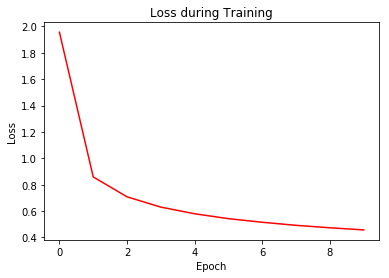

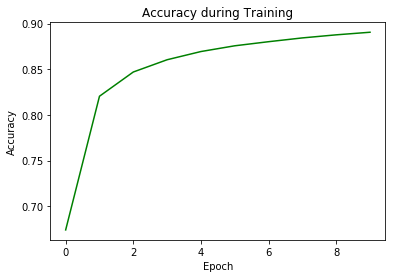

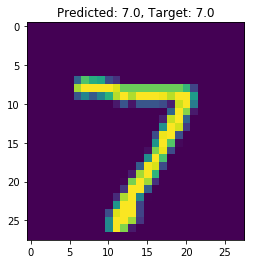

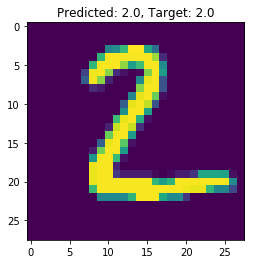

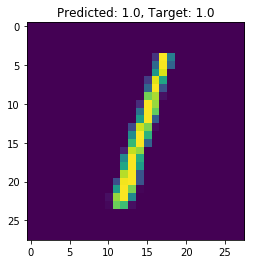

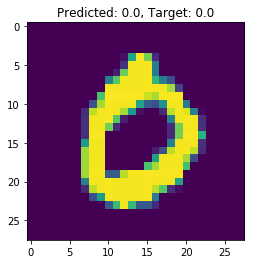

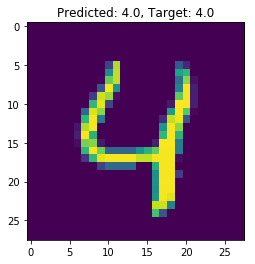

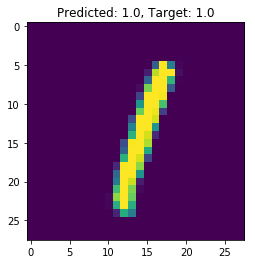

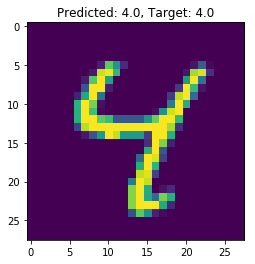

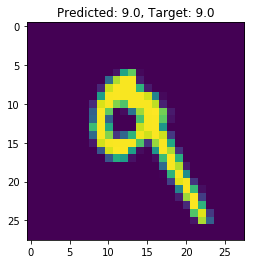

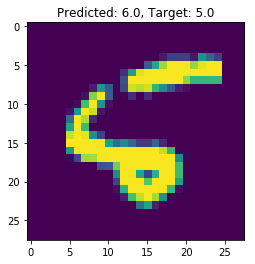

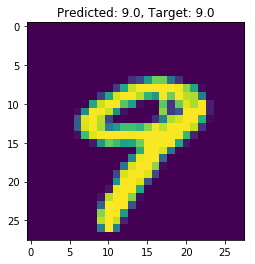

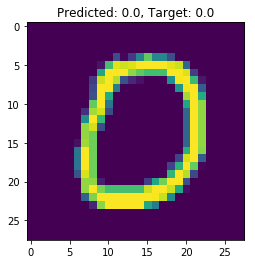

In [0]:
plot(samples = 10)